In [1]:
import pyteomics.mzml
import spectrum_utils.spectrum as sus
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.iplot as isup
import data_loader as dl

RDKit WARNING: [14:51:47] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def get_spec(my_scan, my_peptide, mzml):
    my_id = 'controllerType=0 controllerNumber=1 scan='+ my_scan
    spectrum_dict = mzml.get_by_id(my_id)
    
    
    spectrum_id = spectrum_dict['id']
    mz_array = spectrum_dict['m/z array']
    intensity_array = spectrum_dict['intensity array']
    retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
    precursor = spectrum_dict['precursorList']['precursor'][0]
    precursor_ion = precursor['selectedIonList']['selectedIon'][0]
    precursor_mz = precursor_ion['selected ion m/z']

    if 'charge state' in precursor_ion:
        precursor_charge = int(precursor_ion['charge state'])
    elif 'possible charge state' in precursor_ion:
        precursor_charge = int(precursor_ion['possible charge state'])
    else:
        raise ValueError('Unknown precursor charge')

    scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
    ms_level = spectrum_dict["ms level"]
    total_ion_curr = spectrum_dict["total ion current"]
    ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

    spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
                        mz_array, intensity_array, None, retention_time, peptide=my_peptide)
 
    # Process the MS/MS spectrum.
    fragment_tol_mass = 50
    fragment_tol_mode = 'ppm'    
    spectrum = (spectrum.annotate_peptide_fragments(fragment_tol_mass, fragment_tol_mode,
                                            ion_types='by',max_ion_charge=precursor_charge))
    
#     print(precursor_charge)
    return spectrum
#     fig, ax = plt.subplots(figsize=(12, 6))
#     sup.spectrum(spectrum, ax=ax)
#     plt.show()
#     plt.close()


In [3]:
mzml_bulk1 = pyteomics.mzml.MzML('data/Project_PXD011163/mzMLs/OR11_20160122_PG_HeLa_CVB3_CT_A.mzML')
mzml_bulk2 = pyteomics.mzml.MzML('data/Project_PXD011163/mzMLs/OR11_20160122_PG_HeLa_CVB3_CT_B.mzML')
mzml_bulk3 = pyteomics.mzml.MzML('data/Project_PXD011163/mzMLs/OR11_20160122_PG_HeLa_CVB3_CT_C.mzML')

In [4]:
mzml_2ng1 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_J3_30umTB_2ngQC_60m_1.mzML')
mzml_2ng2 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_J3_30umTB_2ngQC_60m_2.mzML')
mzml_2ng3 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_K13_30umTA_2ngQC_60m_1.mzML')
mzml_2ng4 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_K13_30umTA_2ngQC_60m_2.mzML')
mzml_2ng5 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_W17_30umTB_2ngQC_60m_1.mzML')
mzml_2ng6 = pyteomics.mzml.MzML('data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_W17_30umTB_2ngQC_60m_2.mzML')

In [5]:
mzml_02ng1 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_J3_30umTB_02ngQC_60m_1.mzML')
mzml_02ng2 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_J3_30umTB_02ngQC_60m_2.mzML')
mzml_02ng3 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_K13_30umTA_02ngQC_60m_1.mzML')
mzml_02ng4 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_K13_30umTA_02ngQC_60m_2.mzML')
mzml_02ng5 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_W17_30umTA_02ngQC_60m_3.mzML')
mzml_02ng6 = pyteomics.mzml.MzML('data/02ng_Files_March_19_2021/mzMLs/Ex_Auto_W17_30umTA_02ngQC_60m_4.mzML')

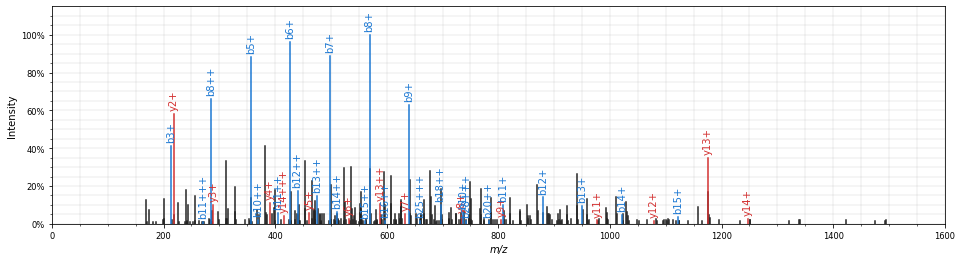

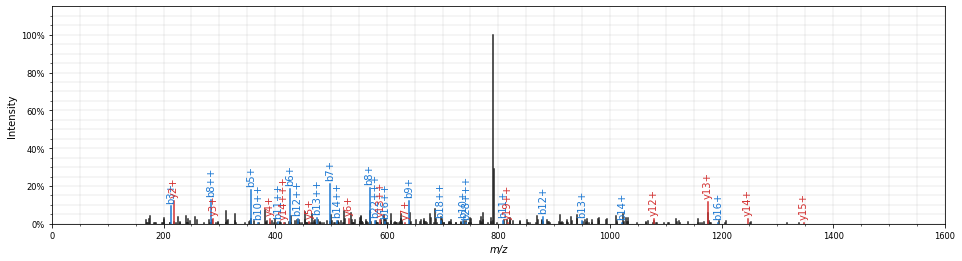

In [8]:
peptide ='AAAAAAAAAPAAAATAPTTAATTAATAAQ'

spectrum = get_spec('52286',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

spectrum = get_spec('51489',peptide ,mzml_bulk2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

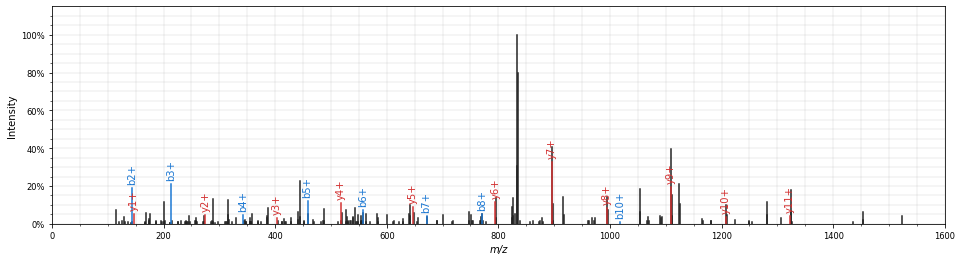

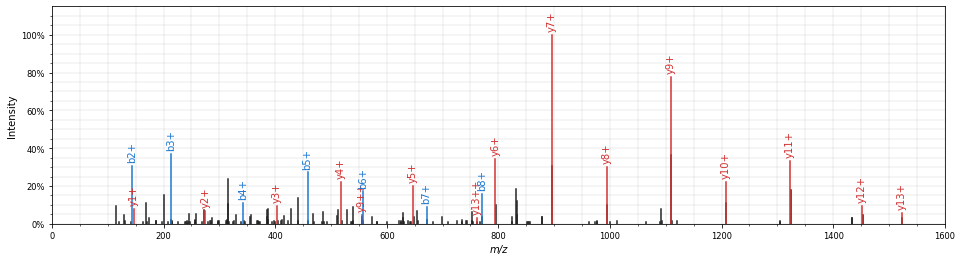

In [9]:
peptide ='AAAEDVNVTFEDQQK'

spectrum = get_spec('37964',peptide,mzml_bulk3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

spectrum = get_spec('38390',peptide ,mzml_bulk3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

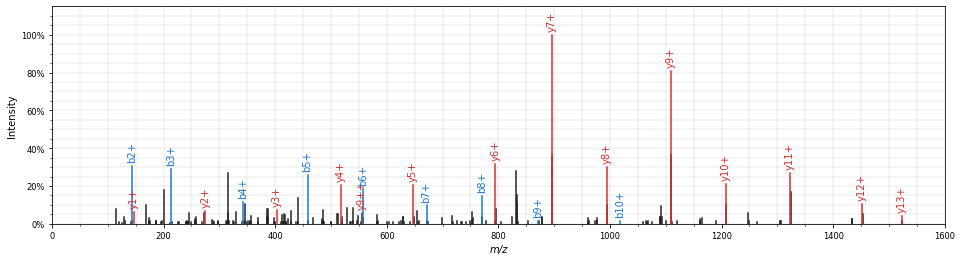

ValueError: Unknown precursor charge

In [11]:
peptide ='AAAEDVNVTFEDQQK' #score of .1

spectrum = get_spec('38670',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

spectrum = get_spec('38716',peptide ,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.show()

# Bulk good, 2ng good, 2ng mediocre

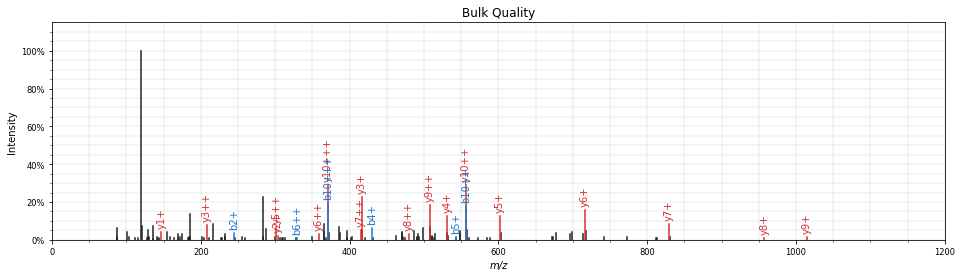

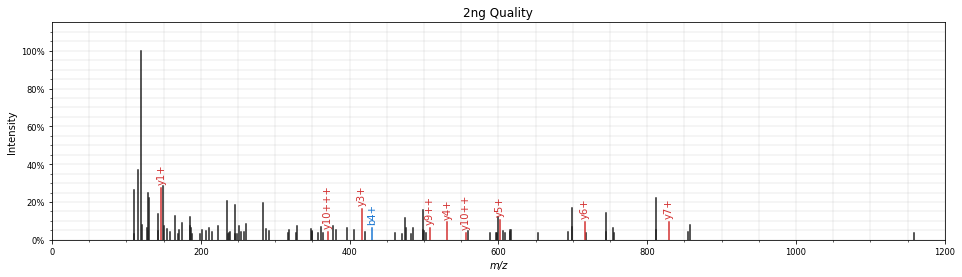

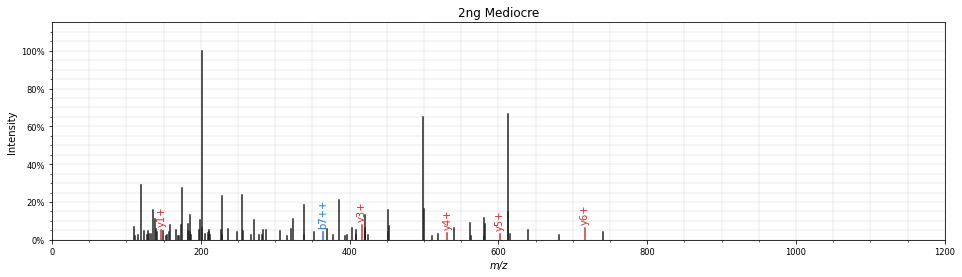

In [13]:
peptide ='FPGQLNADLRK'

spectrum = get_spec('37315',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('16176',peptide ,mzml_2ng2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Quality')
plt.show()


spectrum = get_spec('16324',peptide ,mzml_2ng5)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Mediocre')
plt.show()

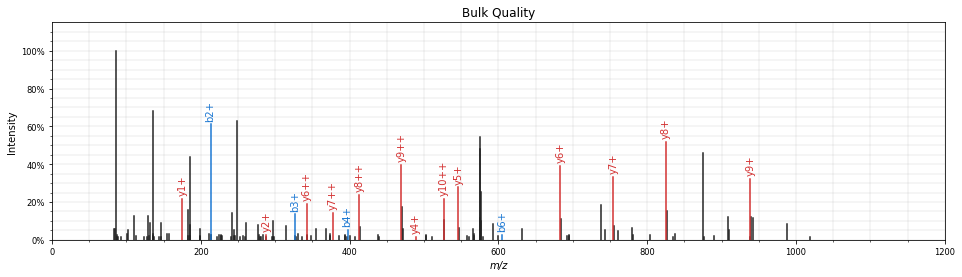

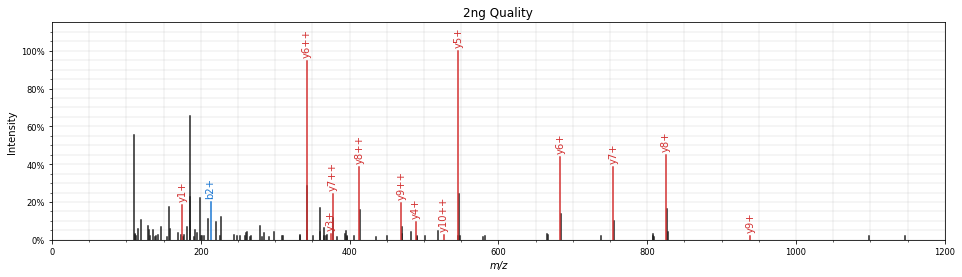

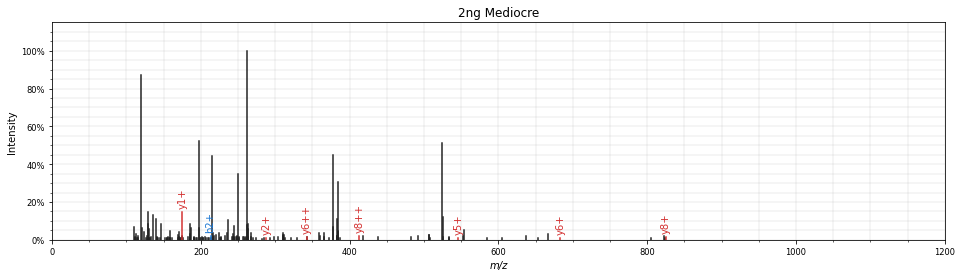

In [20]:
peptide ='VLIAAHGNSLR'

spectrum = get_spec('19981',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('12068',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Quality')
plt.show()


spectrum = get_spec('10061',peptide ,mzml_2ng3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Mediocre')
plt.show()

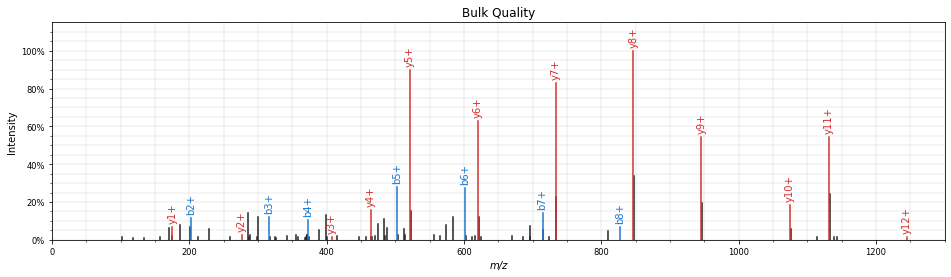

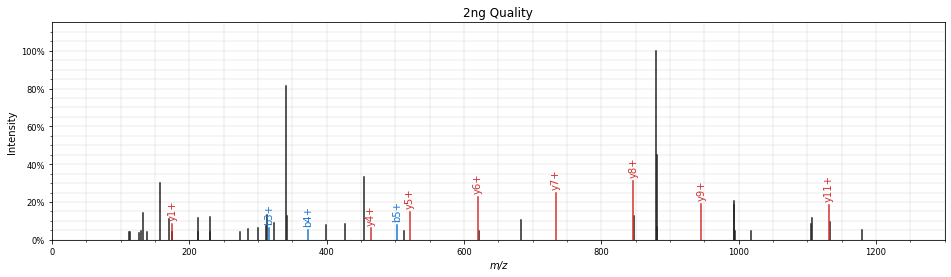

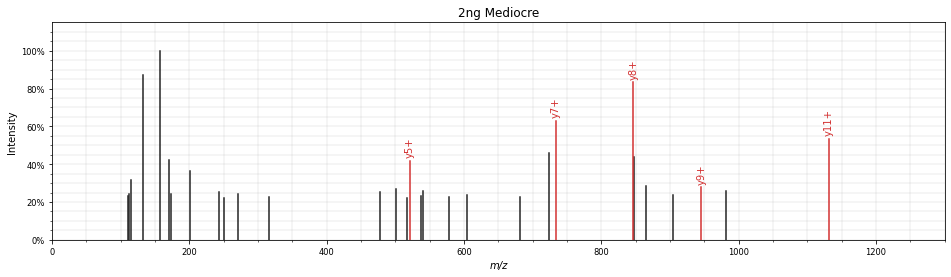

In [33]:
peptide ='SDIGEVILVGGMTR'

spectrum = get_spec('92623',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('24450',peptide ,mzml_2ng3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.title('2ng Quality')
plt.show()


spectrum = get_spec('24688',peptide ,mzml_2ng3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.title('2ng Mediocre')
plt.show()

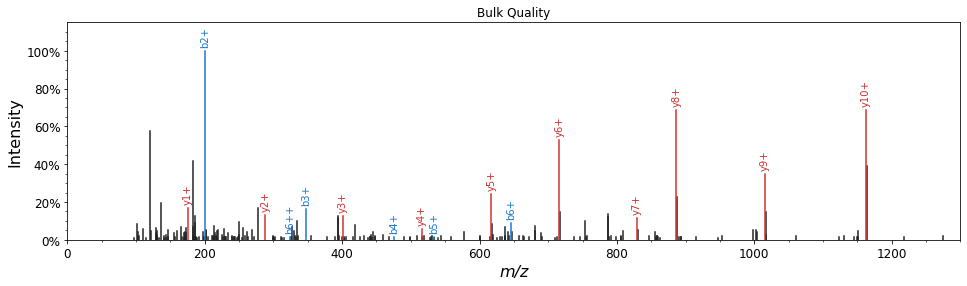

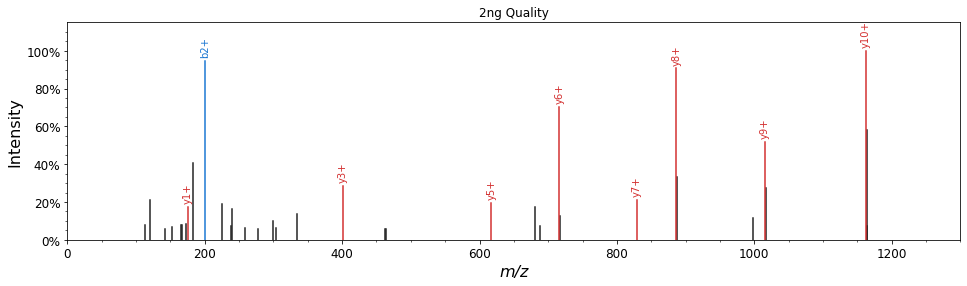

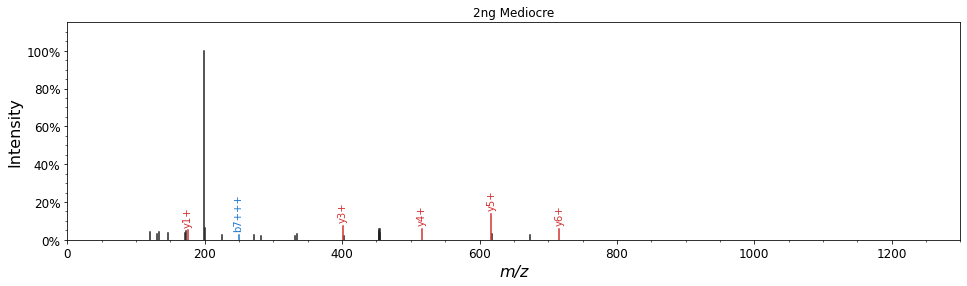

In [47]:
peptide ='AQFEGIVTDLIR'

spectrum = get_spec('108797',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.title('Bulk Quality')
plt.grid(b=False, which='both')
plt.savefig('figure1_bulk.png', dpi=300)
plt.show()

spectrum = get_spec('29708',peptide ,mzml_2ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.title('2ng Quality')
plt.grid(b=False, which='both')
plt.savefig('figure1_2ngQ.png', dpi=300)
plt.show()


spectrum = get_spec('29744',peptide ,mzml_2ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1300)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.title('2ng Mediocre')
plt.grid(b=False, which='both')
plt.savefig('figure1_2ngM.png', dpi=300)
plt.show()

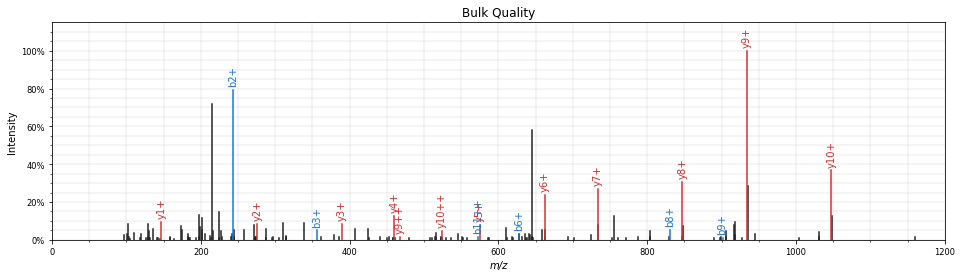

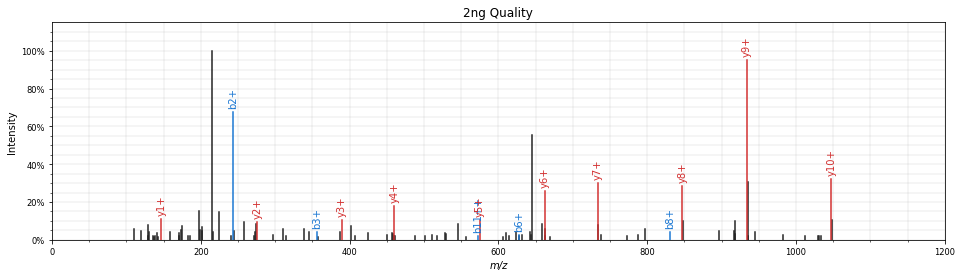

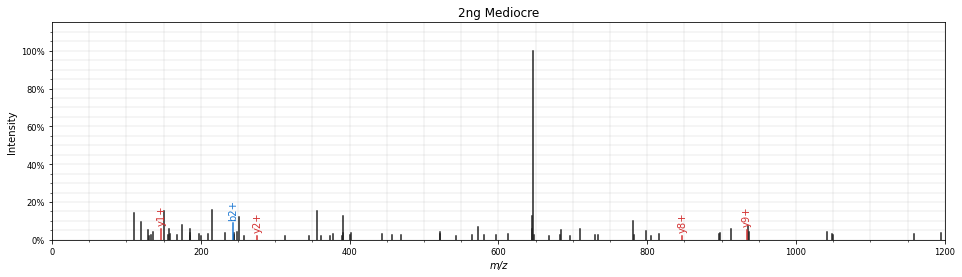

In [17]:
peptide ='ELISNASDALEK'

spectrum = get_spec('45059',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('15246',peptide ,mzml_2ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Quality')
plt.show()


spectrum = get_spec('15297',peptide ,mzml_2ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.title('2ng Mediocre')
plt.show()

# Look across all files

## VTNGAFTGEISPGMIK

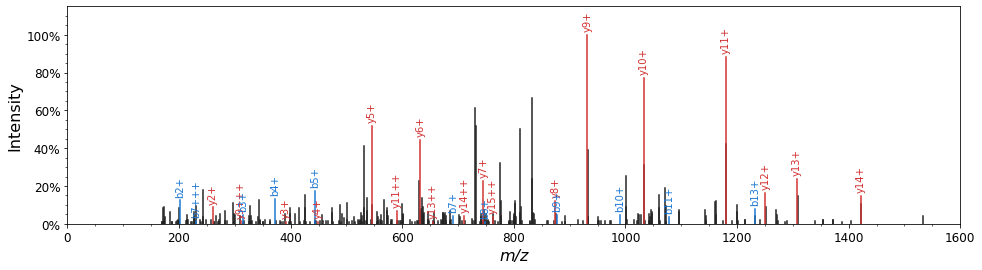

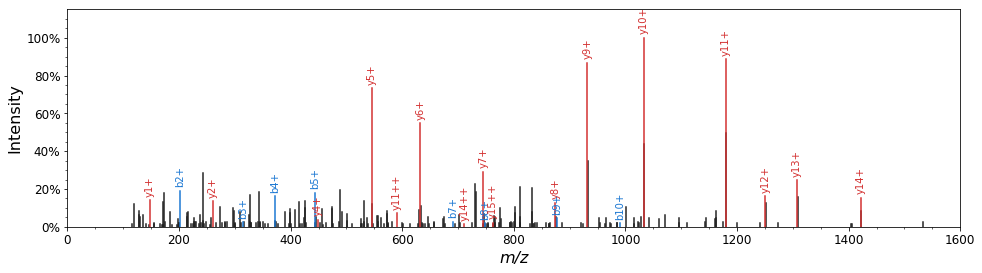

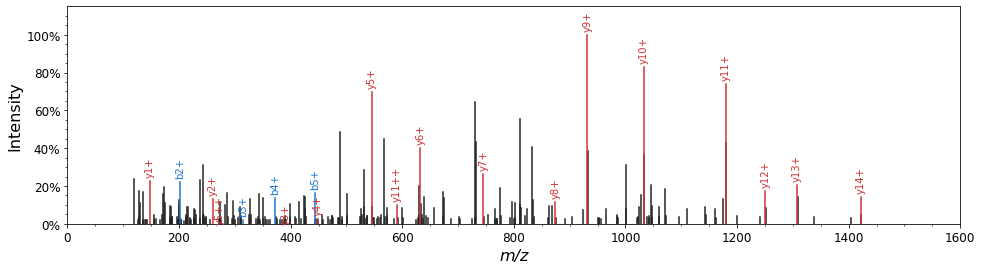

In [39]:
peptide = 'VTNGAFTGEISPGMIK'

spectrum = get_spec('72291',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure1_rep1.png', dpi=300)
plt.show()

spectrum = get_spec('70483',peptide,mzml_bulk2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure1_rep2.png', dpi=300)
plt.show()

spectrum = get_spec('71194',peptide,mzml_bulk3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure1_rep3.png', dpi=300)
plt.show()

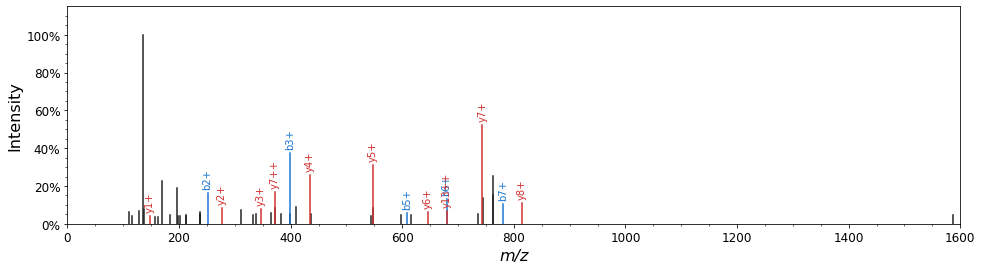

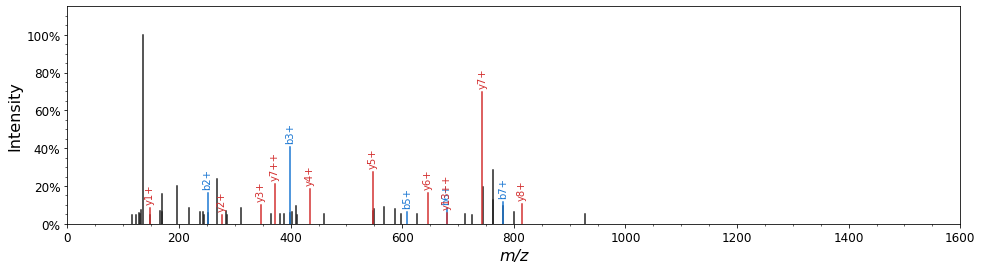

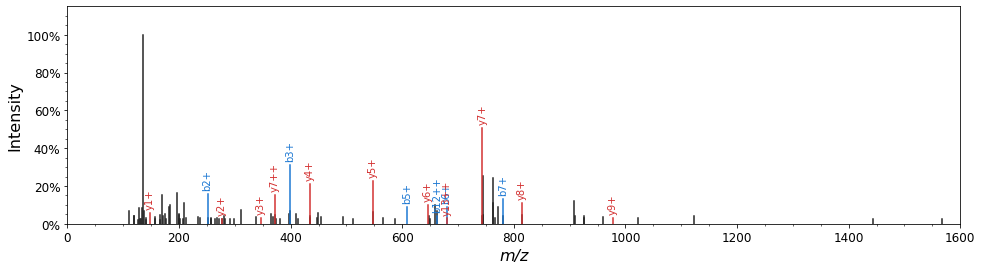

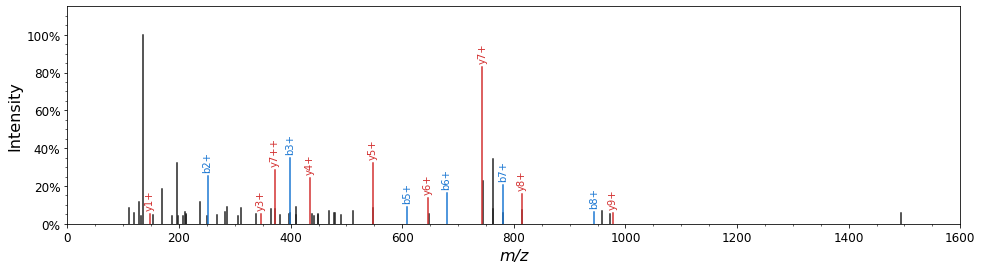

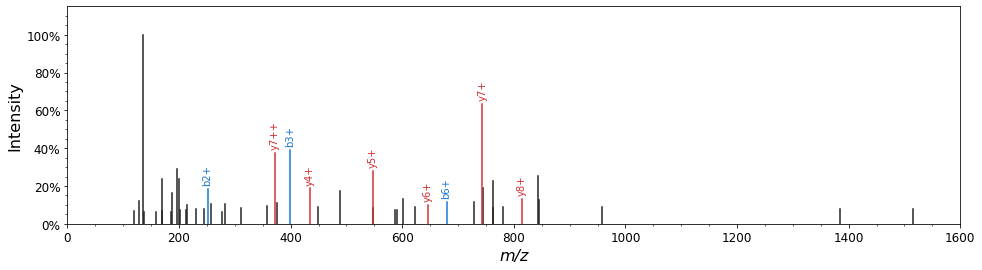

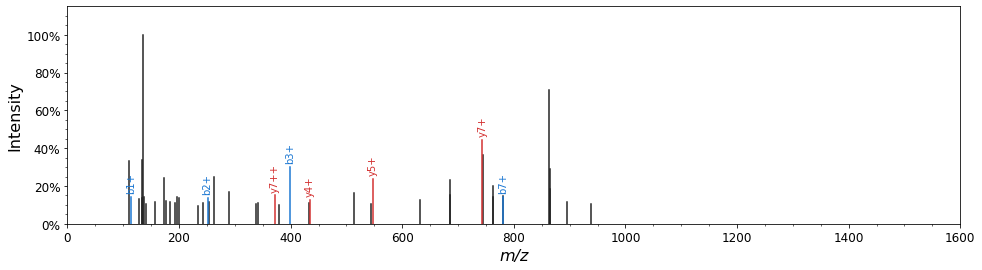

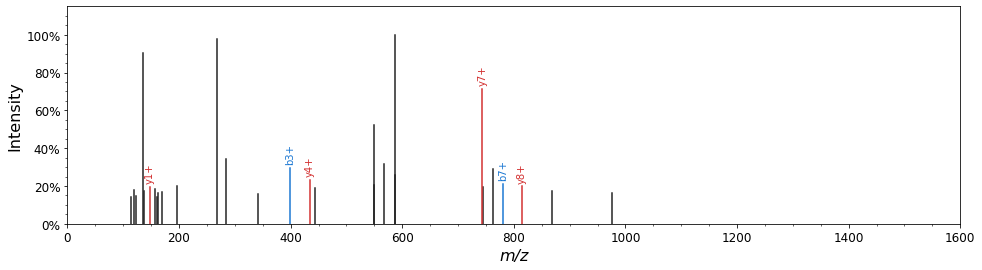

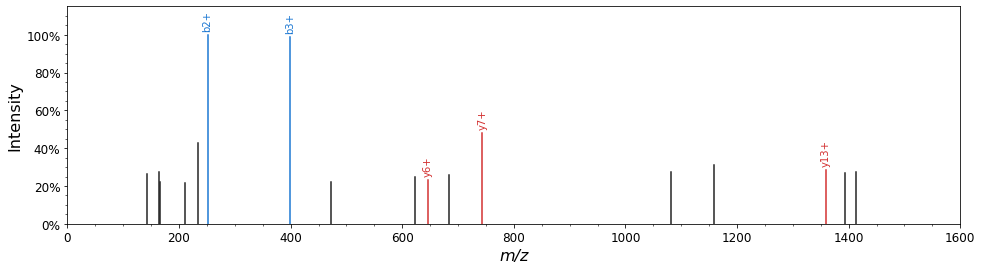

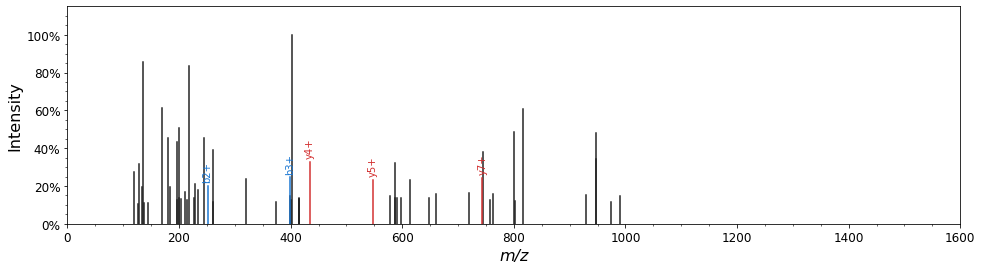

In [46]:
peptide = 'IHFPLATYAPVISAEK'


spectrum = get_spec('29204',peptide ,mzml_2ng1) #pval:000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_1.png', dpi=300)
plt.show()

spectrum = get_spec('28957',peptide ,mzml_2ng2) #qval: 0.000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_2.png', dpi=300)
plt.show()

spectrum = get_spec('25308',peptide ,mzml_2ng3)#pval:000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_3.png', dpi=300)
plt.show()

spectrum = get_spec('24871',peptide ,mzml_2ng4) #:qval: 000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_4.png', dpi=300)
plt.show()

spectrum = get_spec('27641',peptide ,mzml_2ng5) #qval:.001
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_5.png', dpi=300)
plt.show()

spectrum = get_spec('26124',peptide ,mzml_2ng3) #qval:.005
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_6.png', dpi=300)
plt.show()


#mediocre spectra
spectrum = get_spec('28986',peptide ,mzml_2ng1) #pval:0.015
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_7.png', dpi=300)
plt.show()

spectrum = get_spec('29724',peptide ,mzml_2ng1) #pval:0.047
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_8.png', dpi=300)
plt.show()


spectrum = get_spec('28616',peptide ,mzml_2ng5) #qval: 0.076
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure2_9.png', dpi=300)
plt.show()



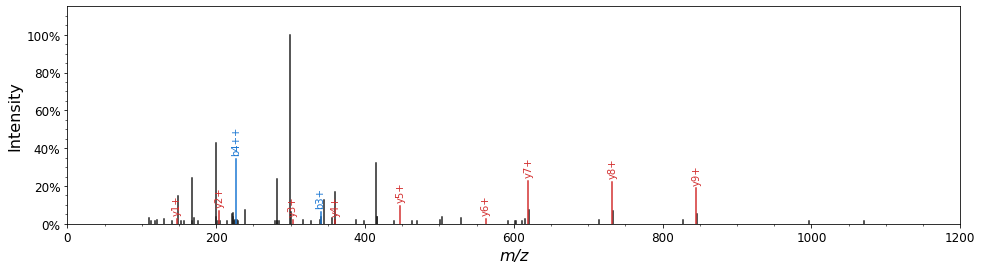

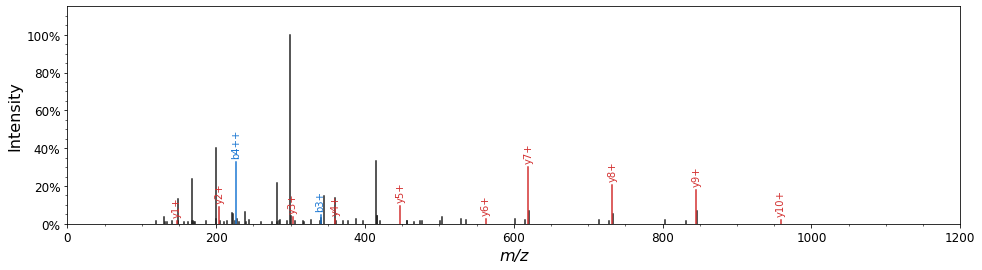

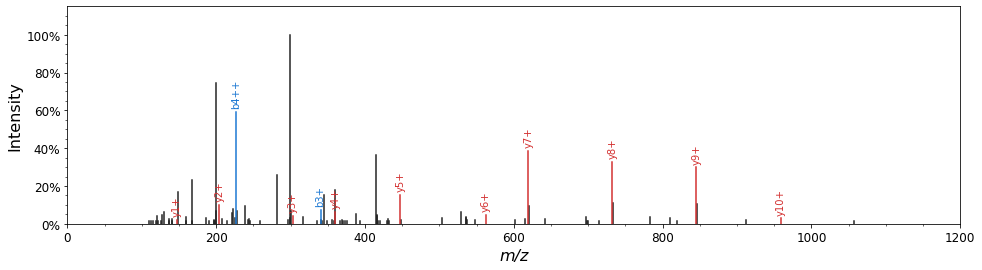

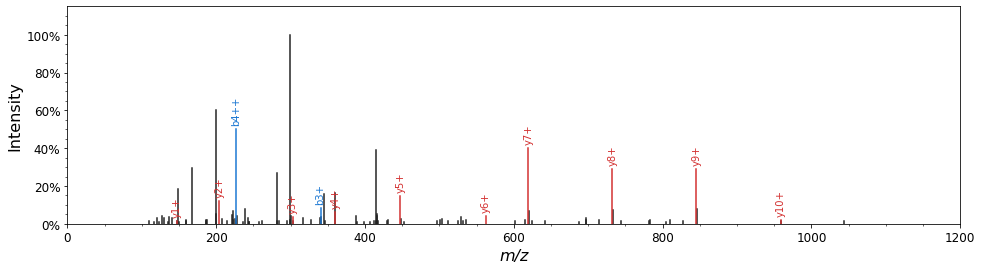

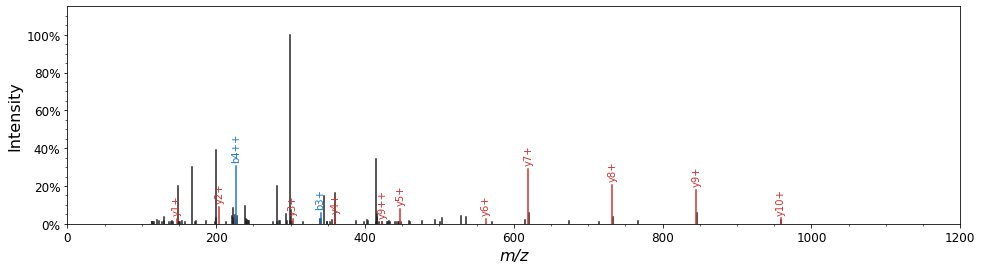

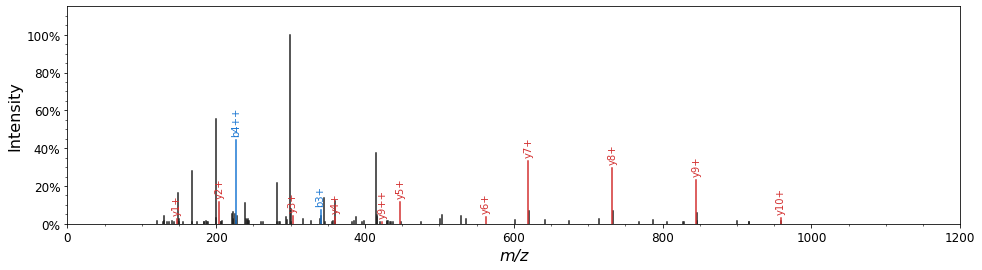

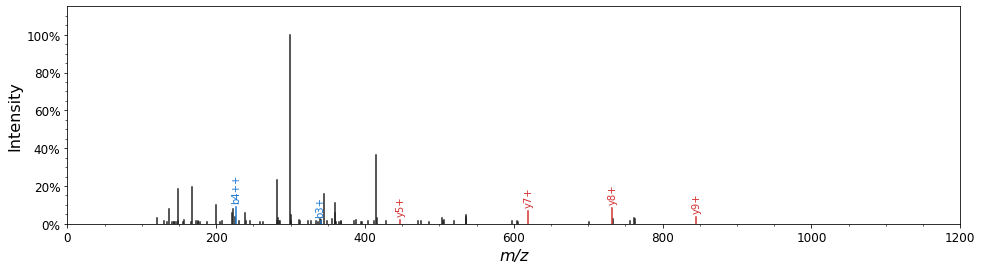

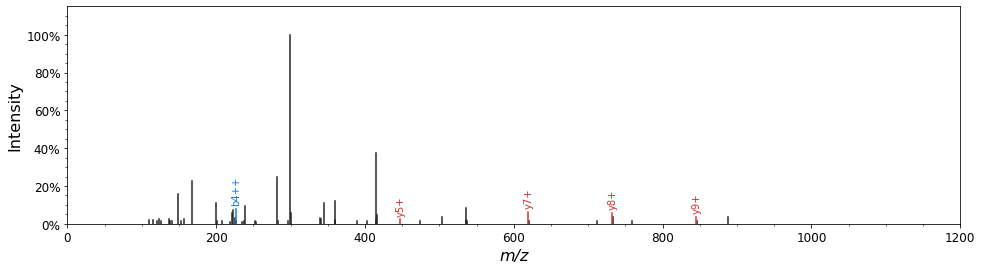

In [41]:
peptide = 'LLLIGDSGVGK'

spectrum = get_spec('14331',peptide ,mzml_02ng1) # .0.000000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_1.png', dpi=300)
plt.show()

spectrum = get_spec('14665',peptide ,mzml_02ng2) # .0000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_2.png', dpi=300)
plt.show()

spectrum = get_spec('12856',peptide ,mzml_02ng3)# .000
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_3.png', dpi=300)
plt.show()

spectrum = get_spec('12595',peptide ,mzml_02ng4) #0
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_4.png', dpi=300)
plt.show()


spectrum = get_spec('15516',peptide ,mzml_02ng5) #00
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_5.png', dpi=300)
plt.show()

spectrum = get_spec('15867',peptide ,mzml_02ng6) #00
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_6.png', dpi=300)
plt.show()


#mediocre spectra
spectrum = get_spec('13867',peptide ,mzml_02ng2)# 0.011481
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_7.png', dpi=300)
plt.show()


spectrum = get_spec('13538',peptide ,mzml_02ng1) #.033939
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1200)
plt.ylabel('Intensity', fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('m/z', fontsize=16)
plt.xticks(fontsize=12)
plt.grid(b=False, which='both')
plt.savefig('supfigure3_8.png', dpi=300)
plt.show()


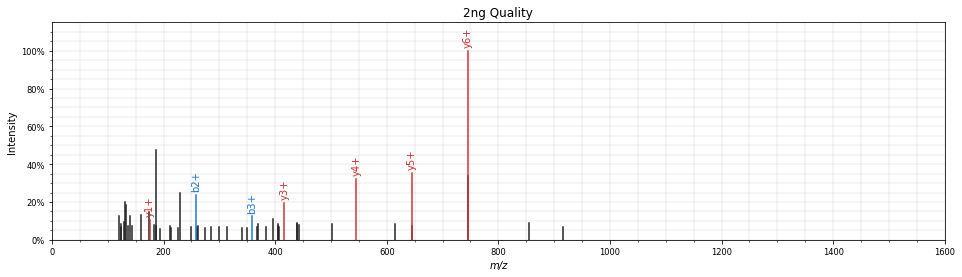

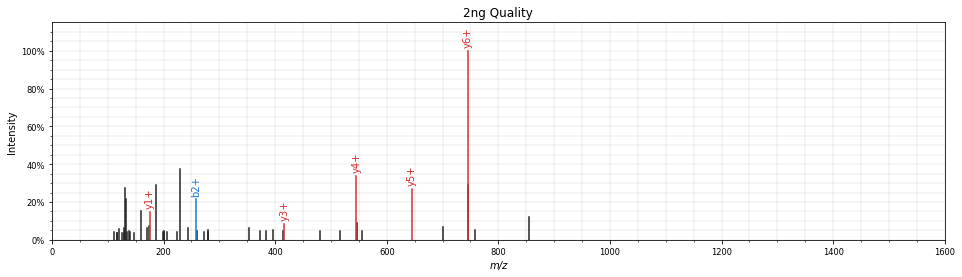

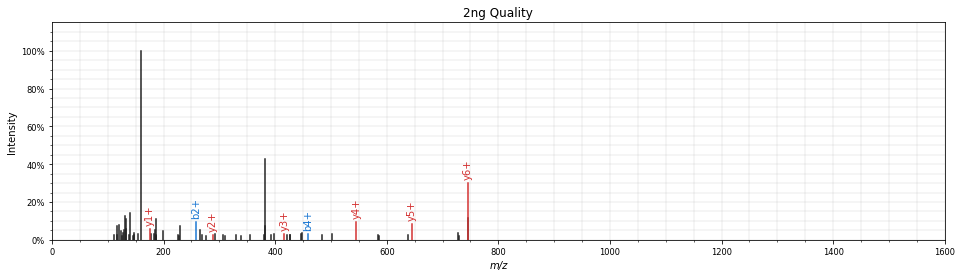

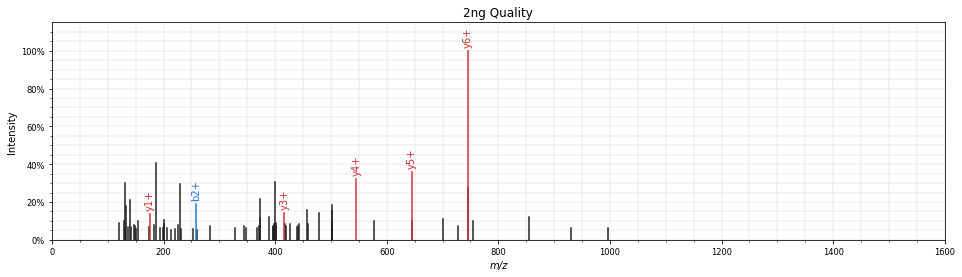

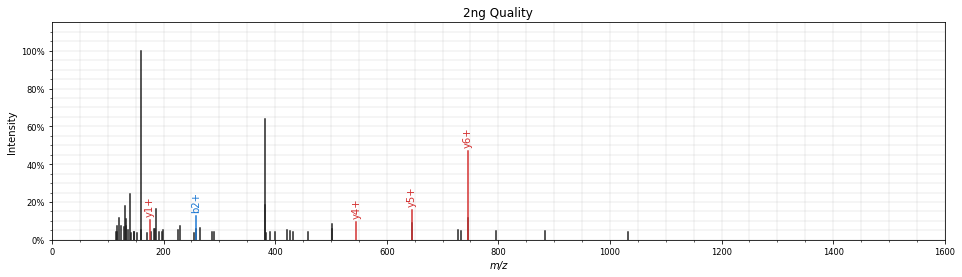

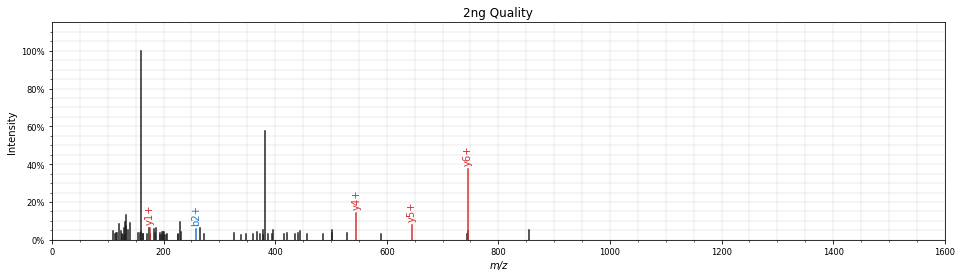

In [30]:
peptide = 'AWTVEQLR'


spectrum = get_spec('12989',peptide ,mzml_02ng1) # .0008
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('13283',peptide ,mzml_02ng2) # .003
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('11680',peptide ,mzml_02ng3)# .001
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()



spectrum = get_spec('14046',peptide ,mzml_02ng5)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

#mediocre spectra
spectrum = get_spec('11421',peptide ,mzml_02ng4) #.019
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()


spectrum = get_spec('11674',peptide ,mzml_02ng3)# .021
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()



# spectrum = get_spec('15961',peptide ,mzml_02ng6)
# fig, ax = plt.subplots(figsize=(16, 4))
# sup.spectrum(spectrum, ax=ax)
# plt.xlim(0, 1600)
# plt.title('2ng Quality')
# plt.show()

## EIGNIISDAMK

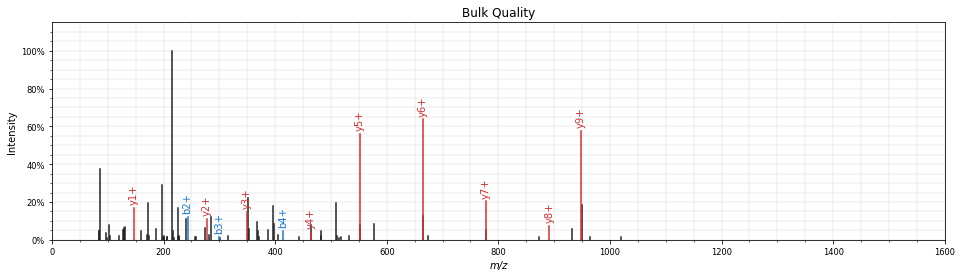

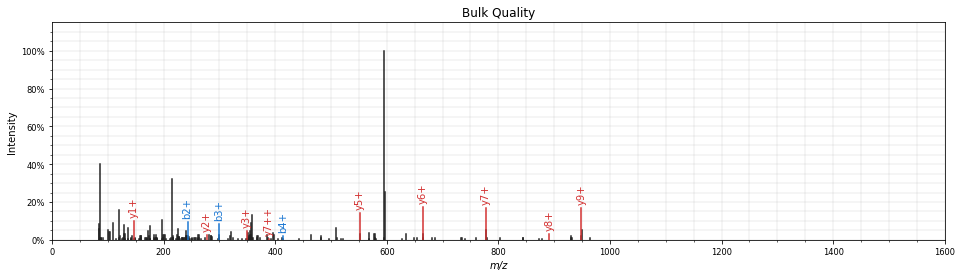

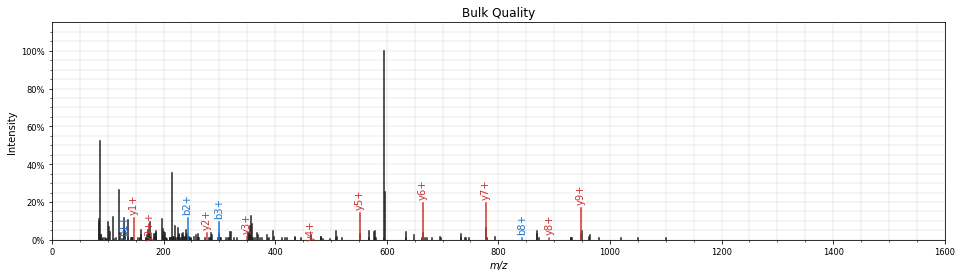

In [106]:
peptide = 'EIGNIISDAMK'

spectrum = get_spec('80325',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('78240',peptide,mzml_bulk2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('79213',peptide,mzml_bulk3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

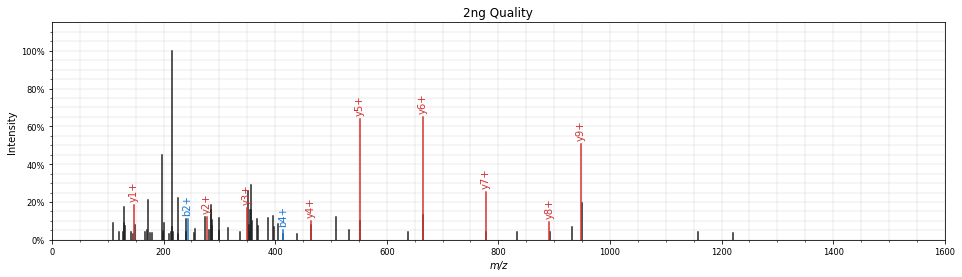

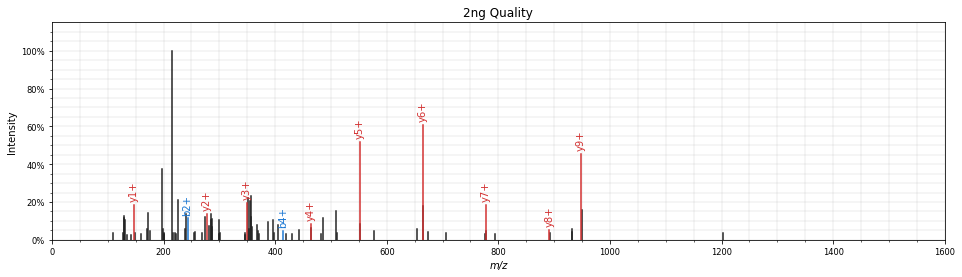

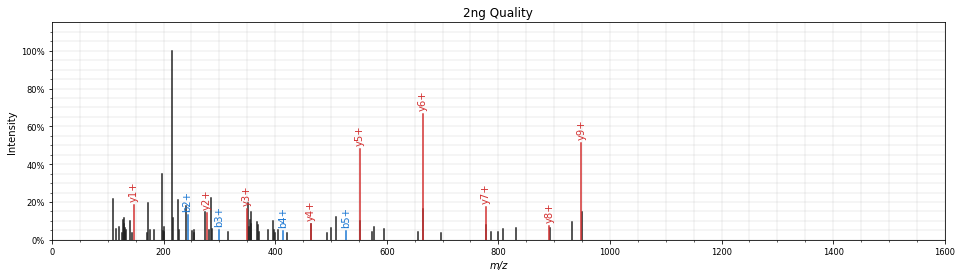

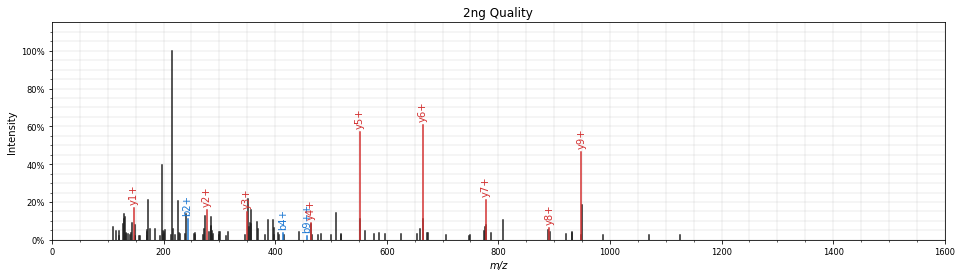

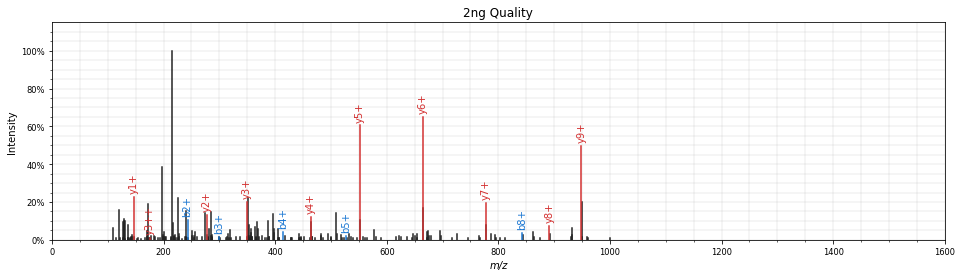

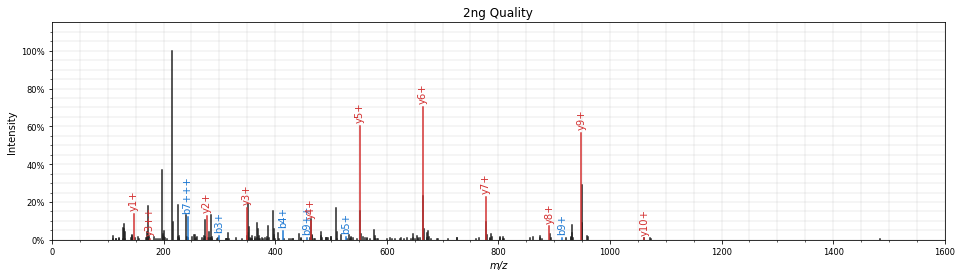

In [107]:
peptide = 'EIGNIISDAMK'


spectrum = get_spec('24767',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('24594',peptide ,mzml_2ng2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('21086',peptide ,mzml_2ng3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('20547',peptide ,mzml_2ng4)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('24267',peptide ,mzml_2ng5)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('22611',peptide ,mzml_2ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

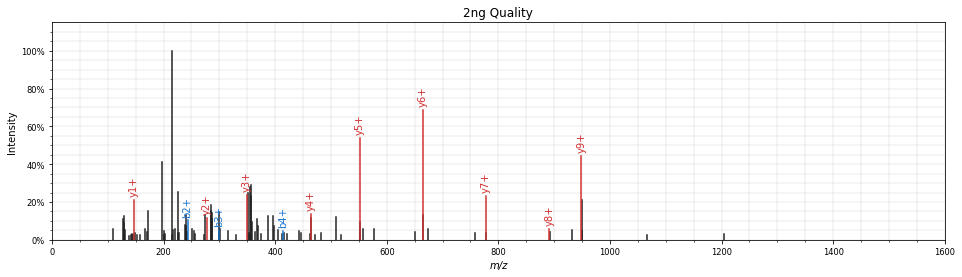

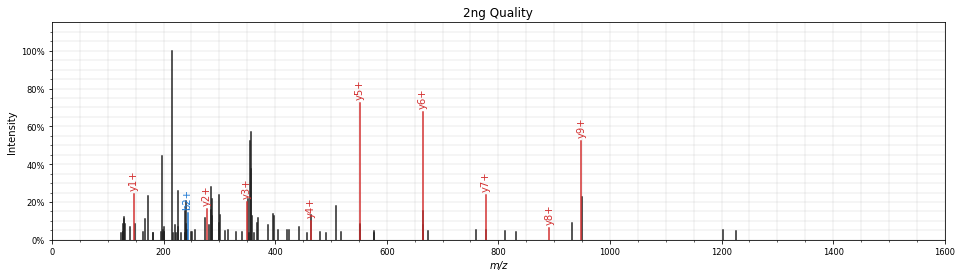

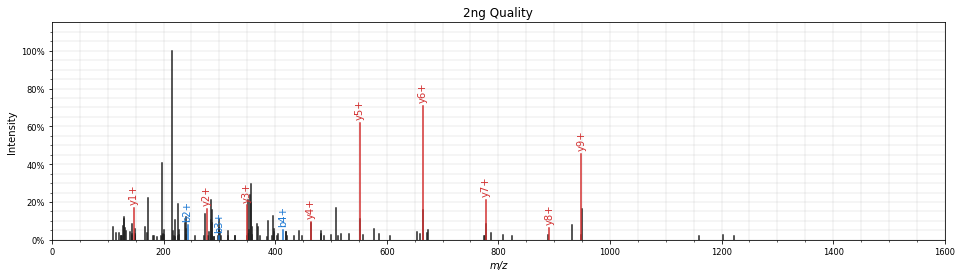

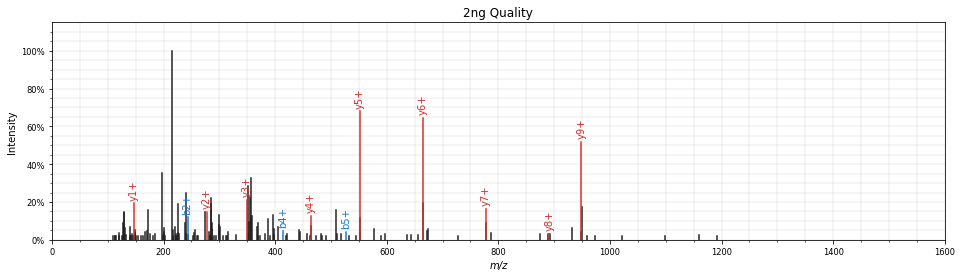

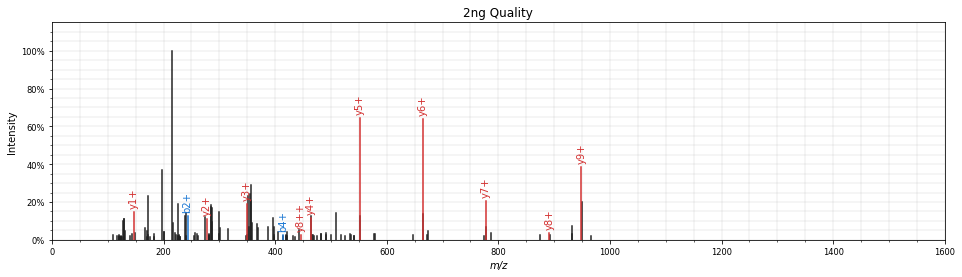

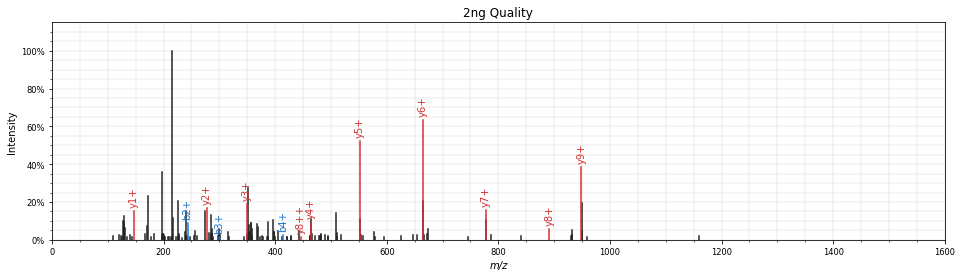

In [121]:
peptide = 'EIGNIISDAMK'


spectrum = get_spec('15415',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('15722',peptide ,mzml_02ng2)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('14050',peptide ,mzml_02ng3)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('13779',peptide ,mzml_02ng4)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('16573',peptide ,mzml_02ng5)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('16924',peptide ,mzml_02ng6)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

# Medicore spectra

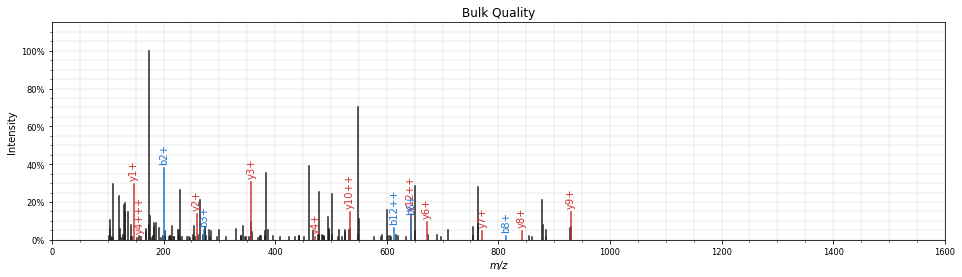

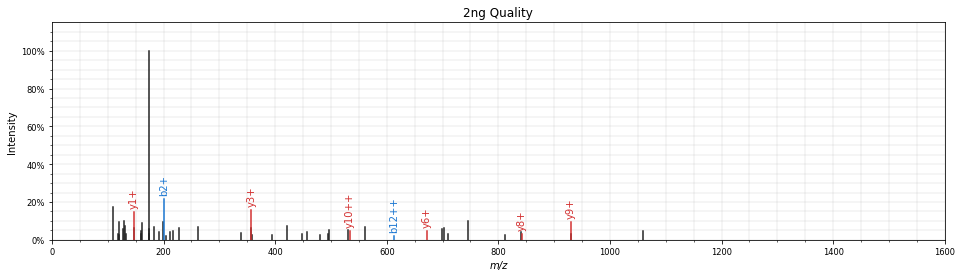

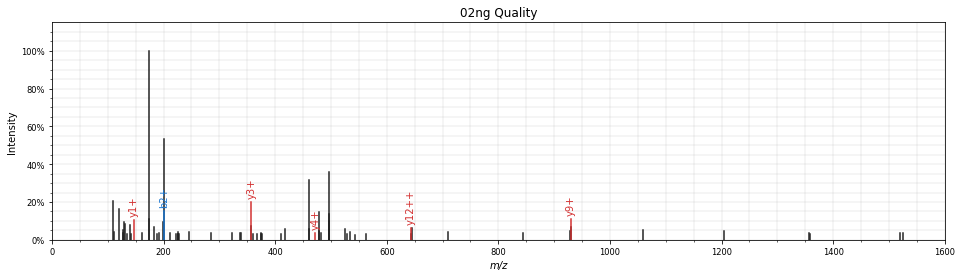

In [134]:
peptide = 'SIAFHSAVSLDPIK'

spectrum = get_spec('73518',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('24123',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('14953',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('02ng Quality')
plt.show()

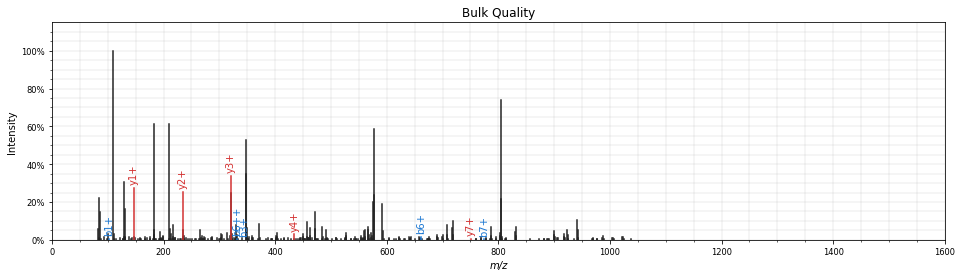

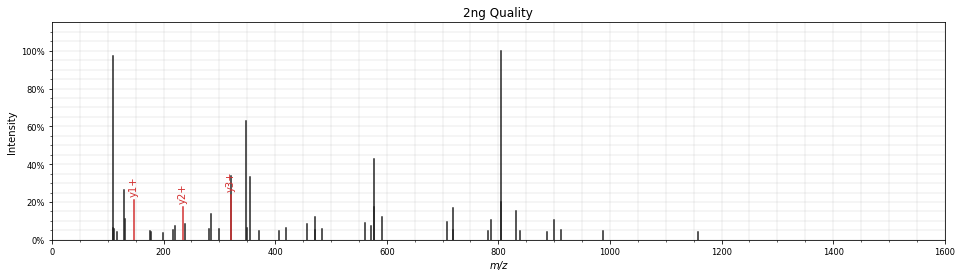

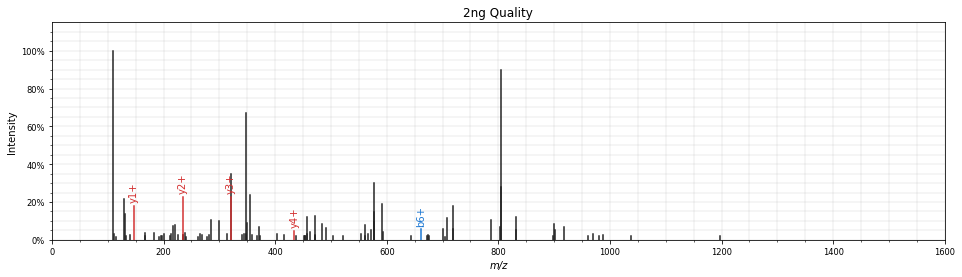

In [126]:
peptide = 'TKDCNVISSK'

spectrum = get_spec('7490',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('8953',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('6403',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

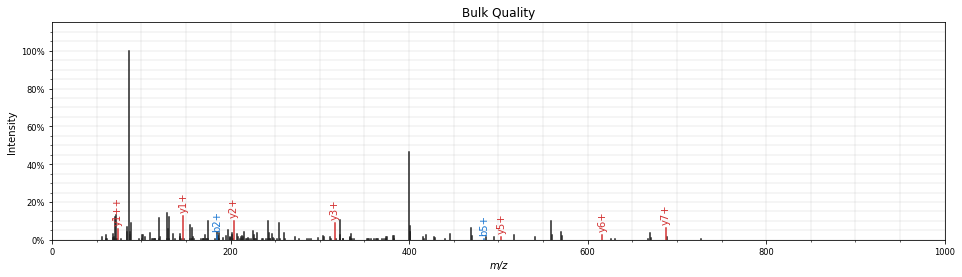

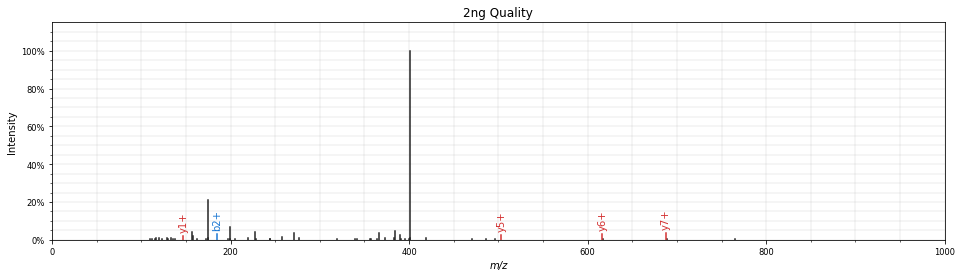

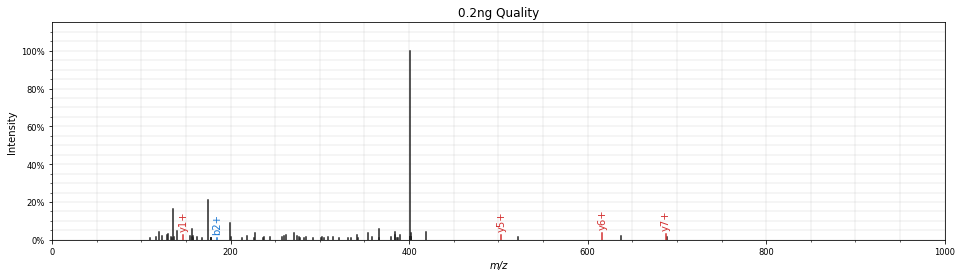

In [129]:
peptide = 'IALDALGK'

spectrum = get_spec('41553',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('16758',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('10915',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('0.2ng Quality')
plt.show()

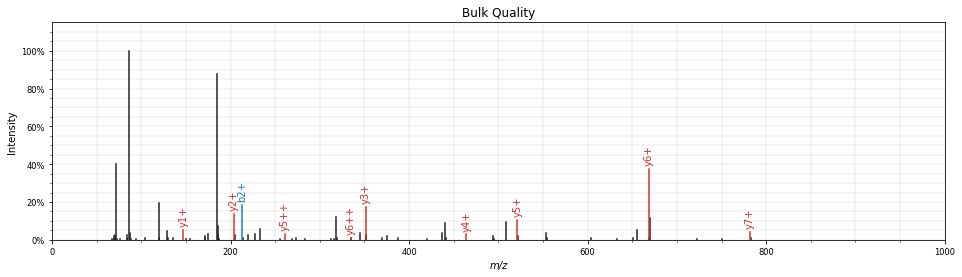

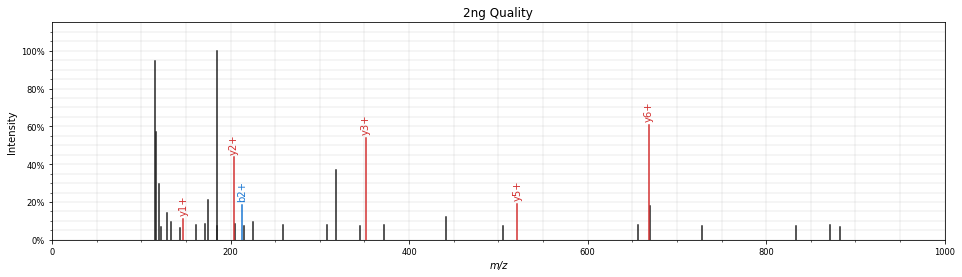

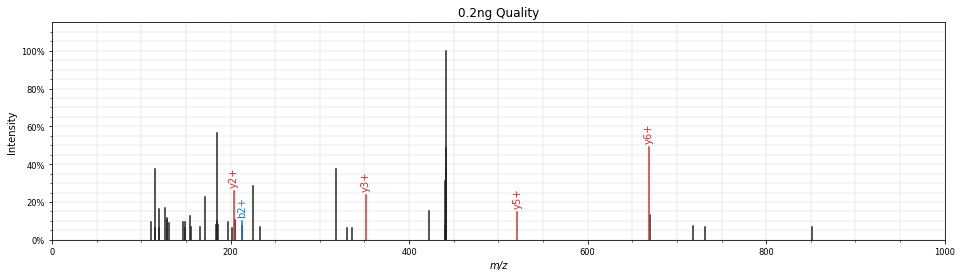

In [137]:
peptide = 'VIFGLFGK'

spectrum = get_spec('102487',peptide,mzml_bulk1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('30794',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('18727',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1000)
plt.title('0.2ng Quality')
plt.show()

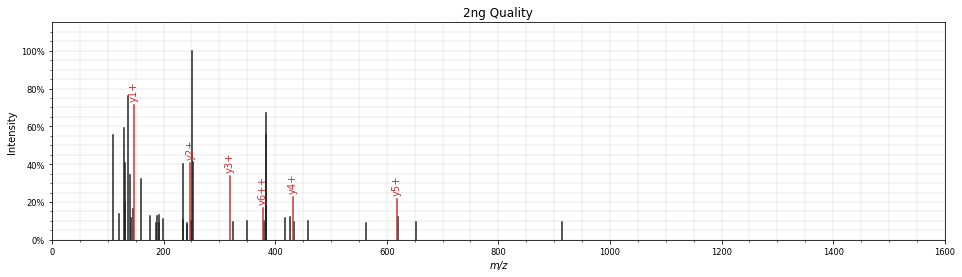

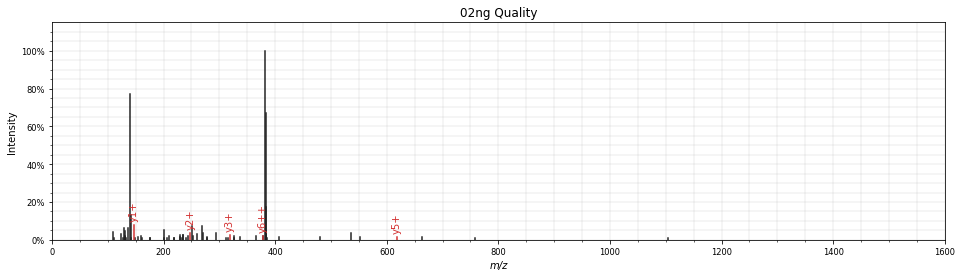

In [133]:
peptide = 'DYNHWLATK'

# spectrum = get_spec('44482',peptide,mzml_bulk1)
# fig, ax = plt.subplots(figsize=(16, 4))
# sup.spectrum(spectrum, ax=ax)
# plt.xlim(0, 1600)
# plt.title('Bulk Quality')
# plt.show()

spectrum = get_spec('16535',peptide ,mzml_2ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

spectrum = get_spec('10861',peptide ,mzml_02ng1)
fig, ax = plt.subplots(figsize=(16, 4))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('02ng Quality')
plt.show()

# Show missing peaks

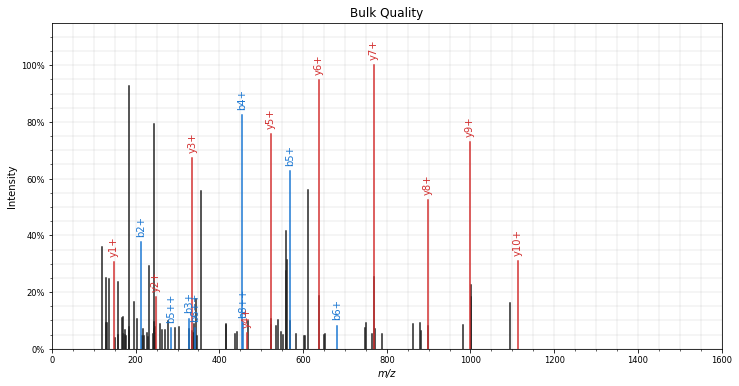

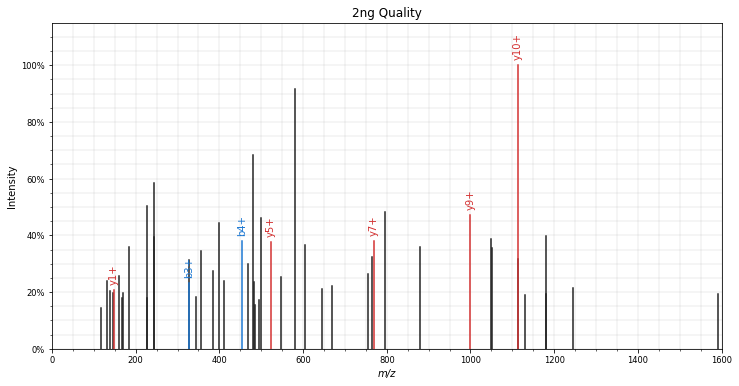

In [108]:
peptide = 'VINQILTEMDGMSTK'

spectrum = get_spec('95198',peptide,mzml_bulk)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('28241',peptide ,mzml_2ng)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

# Show intensity range

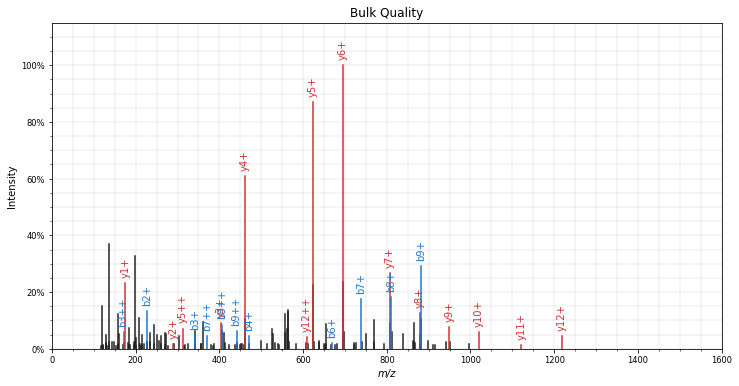

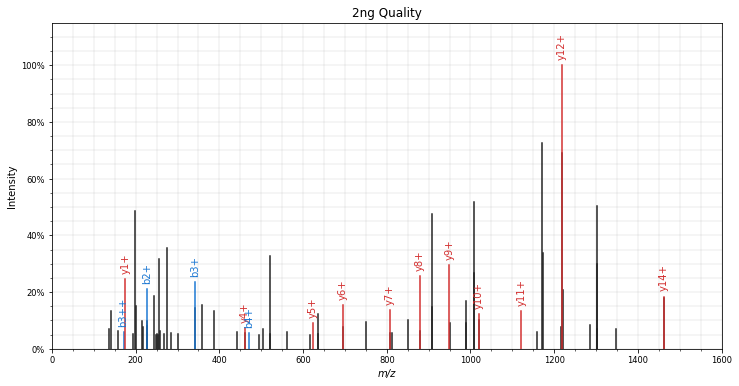

In [109]:
peptide = 'IINEPTAAAIAYGLDR'

spectrum = get_spec('89697',peptide,mzml_bulk)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('Bulk Quality')
plt.show()

spectrum = get_spec('26235',peptide ,mzml_2ng)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.xlim(0, 1600)
plt.title('2ng Quality')
plt.show()

# Old code

In [110]:
stop

NameError: name 'stop' is not defined

In [ ]:
spectrum = get_spec('6330','SHSPSASQSGSQLR',mzml_2ng)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.show()

In [ ]:
spectrum = get_spec('9009','AAAAAAALQAK',mzml_2ng)
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.show()

In [ ]:
spectrum = get_spec('9009','AAAAAAALQAK',mzml_2ng)
isup.spectrum(spectrum)

In [ ]:
list(psm[psm['scan']==9009]['Matched Ion Mass-To-Charge Ratios'])

In [ ]:
list(psm[psm['scan']==9009]['Matched Ion Intensities'])

In [ ]:
my_id = 'controllerType=0 controllerNumber=1 scan='+ '27032'
spectrum_dict = mzml_2ng1.get_by_id(my_id)


spectrum_id = spectrum_dict['id']
mz_array = spectrum_dict['m/z array']
# mz_array = np.round(mz_array, 3)
intensity_array = spectrum_dict['intensity array']
retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
precursor = spectrum_dict['precursorList']['precursor'][0]
precursor_ion = precursor['selectedIonList']['selectedIon'][0]
precursor_mz = precursor_ion['selected ion m/z']

if 'charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['charge state'])
elif 'possible charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['possible charge state'])
else:
    raise ValueError('Unknown precursor charge')

scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
ms_level = spectrum_dict["ms level"]
total_ion_curr = spectrum_dict["total ion current"]
ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
                        mz_array, intensity_array, None, retention_time, peptide='AAAAAAALQAK')
     

# spectrum = sus.MsmsSpectrum(usi, precursor_mz, precursor_charge,
#                             peaks['mz'].values, peaks['intensity'].values)
# spectrum.filter_intensity(0.05)

tol_mass, tol_mode = 0.5, 'ppm'
# annotate_fragment_mz = [133.102, 147.080, 195.117, 237.164, 267.174, 295.170,
#                         313.181, 355.192, 377.172, 391.187, 451.209, 511.231,
#                         573.245, 633.269]
annotate_fragment_mz = [201.12373352, 504.27853394, 617.36315918, 746.40643311, 817.44451904, 493.27178955]
# annotate_fragment_mz = np.round(annotate_fragment_mz, 3)
for fragment_mz in annotate_fragment_mz:
    spectrum.annotate_mz_fragment(fragment_mz = fragment_mz, 
                                  fragment_tol_mass=tol_mass, 
                                  fragment_tol_mode = tol_mode,
                                 fragment_charge=precursor_charge)

fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.show()
plt.close()


In [ ]:
import numpy as np
list(mz_array)

In [ ]:
mz_array

# graph using annotated mzml
(rather than using peptides)

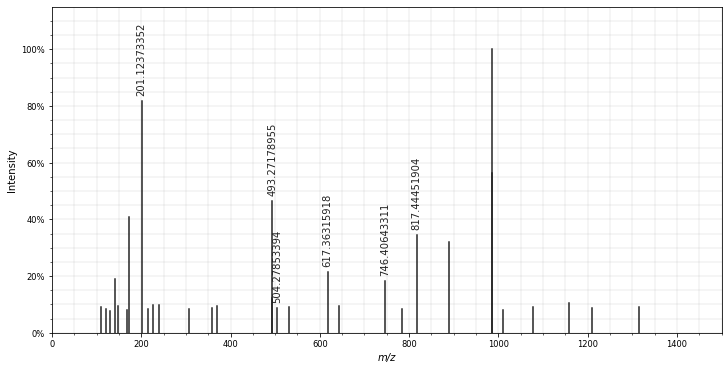

In [41]:
my_id = 'controllerType=0 controllerNumber=1 scan='+ '27032'
spectrum_dict = mzml_2ng1.get_by_id(my_id)


spectrum_id = spectrum_dict['id']
mz_array = spectrum_dict['m/z array']
# mz_array = np.round(mz_array, 3)
intensity_array = spectrum_dict['intensity array']
retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
precursor = spectrum_dict['precursorList']['precursor'][0]
precursor_ion = precursor['selectedIonList']['selectedIon'][0]
precursor_mz = precursor_ion['selected ion m/z']

if 'charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['charge state'])
elif 'possible charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['possible charge state'])
else:
    raise ValueError('Unknown precursor charge')

scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
ms_level = spectrum_dict["ms level"]
total_ion_curr = spectrum_dict["total ion current"]
ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
                        mz_array, intensity_array, None, retention_time, peptide='AAAAAAALQAK')
     

# spectrum = sus.MsmsSpectrum(usi, precursor_mz, precursor_charge,
#                             peaks['mz'].values, peaks['intensity'].values)
# spectrum.filter_intensity(0.05)

tol_mass, tol_mode = 0.5, 'ppm'
# annotate_fragment_mz = [133.102, 147.080, 195.117, 237.164, 267.174, 295.170,
#                         313.181, 355.192, 377.172, 391.187, 451.209, 511.231,
#                         573.245, 633.269]
annotate_fragment_mz = [201.12373352, 504.27853394, 617.36315918, 746.40643311, 817.44451904, 493.27178955]
# annotate_fragment_mz = np.round(annotate_fragment_mz, 3)
for fragment_mz in annotate_fragment_mz:
    spectrum.annotate_mz_fragment(fragment_mz = fragment_mz, 
                                  fragment_tol_mass=tol_mass, 
                                  fragment_tol_mode = tol_mode,
                                 fragment_charge=precursor_charge)

# spectrum = (spectrum.annotate_peptide_fragments(fragment_tol_mass, fragment_tol_mode,
#                                         ion_types='by'))
fig, ax = plt.subplots(figsize=(12, 6))
sup.spectrum(spectrum, ax=ax)
plt.show()
plt.close()

# interactive plot

In [ ]:
my_id = 'controllerType=0 controllerNumber=1 scan='+ '27032'
spectrum_dict = mzml_2ng1.get_by_id(my_id)


spectrum_id = spectrum_dict['id']
mz_array = spectrum_dict['m/z array']
intensity_array = spectrum_dict['intensity array']
retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
precursor = spectrum_dict['precursorList']['precursor'][0]
precursor_ion = precursor['selectedIonList']['selectedIon'][0]
precursor_mz = precursor_ion['selected ion m/z']

if 'charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['charge state'])
elif 'possible charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['possible charge state'])
else:
    raise ValueError('Unknown precursor charge')

scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
ms_level = spectrum_dict["ms level"]
total_ion_curr = spectrum_dict["total ion current"]
ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

# spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
#                     mz_array, intensity_array, peptide='SLVPAAELLESR')

spectrum = sus.MsmsSpectrum(spectrum_id, precursor_mz, precursor_charge,
                    mz_array, intensity_array, peptide='SLVPAAELLESR')



# Process the MS/MS spectrum.
fragment_tol_mass = 20
fragment_tol_mode = 'ppm'    
spectrum = (spectrum.annotate_peptide_fragments(fragment_tol_mass, fragment_tol_mode,
                                        ion_types='by',max_ion_charge=4))

In [ ]:
# spectrum = get_spec('27032',peptide ,mzml_2ng1)
isup.spectrum(spectrum)



In [ ]:
list(mz_array)

# Checking Code

In [ ]:
mzml = pyteomics.mzml.MzML('/Users/hannahboekweg/Payne/comparing_spectra/data/2ng_Files_March_19_2021/mzMLs/Ex_Auto_J3_30umTB_2ngQC_60m_1.mzML')


In [ ]:
myscan = 6330
# mypeptide = 

In [ ]:
psm = dl.load_psm('2ng_rep1')

In [ ]:
mzml_df = dl.load_mzml('2ng_rep1')

In [ ]:
list(psm[psm['scan']== myscan]['Matched Ion Mass-To-Charge Ratios'])

In [ ]:
mzml_df[mzml_df['scan']==myscan]

In [ ]:
my_id = 'controllerType=0 controllerNumber=1 scan='+ '6330'
spectrum_dict = mzml.get_by_id(my_id)


spectrum_id = spectrum_dict['id']
mz_array = spectrum_dict['m/z array']
intensity_array = spectrum_dict['intensity array']
retention_time = (spectrum_dict['scanList']['scan'][0].get('scan start time', -1))
precursor = spectrum_dict['precursorList']['precursor'][0]
precursor_ion = precursor['selectedIonList']['selectedIon'][0]
precursor_mz = precursor_ion['selected ion m/z']

if 'charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['charge state'])
elif 'possible charge state' in precursor_ion:
    precursor_charge = int(precursor_ion['possible charge state'])
else:
    raise ValueError('Unknown precursor charge')

scan_num = spectrum_dict["id"][spectrum_dict["id"].find('scan=') + 5:]
ms_level = spectrum_dict["ms level"]
total_ion_curr = spectrum_dict["total ion current"]
ion_time = spectrum_dict["scanList"]['scan'][0]["ion injection time"]

spectrum = (spectrum.annotate_peptide_fragments(fragment_tol_mass, fragment_tol_mode,
                                            ion_types='by'))
    
isup.spectrum(spectrum)

In [ ]:
list(psm.columns)